
# K-Means Clustering with Customer Dataset

This notebook provides a general framework for performing customer segmentation using unsupervised learning. It includes advanced techniques for data exploration and achieving robust results.

**We will use the [marketing_campain](https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering/input) data set from kaggle. Here is a decription of the dataset :**

| Column Name          | Description                                                                 |
|----------------------|-----------------------------------------------------------------------------|
| `ID`                 | Unique identifier for each customer.                                       |
| `Year_Birth`         | Year of birth of the customer.                                             |
| `Education`          | Level of education attained by the customer (e.g., Graduate, PhD).         |
| `Marital_Status`     | Marital status of the customer (e.g., Single, Married, Divorced).          |
| `Income`             | Annual income of the customer.                                             |
| `Kidhome`            | Number of children in the customer's household.                            |
| `Teenhome`           | Number of teenagers in the customer's household.                           |
| `Dt_Customer`        | Date when the customer was enrolled with the company.                      |
| `Recency`            | Number of days since the customer's last purchase.                         |
| `MntWines`           | Amount spent on wine in the last 2 years.                                  |
| `MntFruits`          | Amount spent on fruits in the last 2 years.                                |
| `MntMeatProducts`    | Amount spent on meat products in the last 2 years.                         |
| `MntFishProducts`    | Amount spent on fish products in the last 2 years.                         |
| `MntSweetProducts`   | Amount spent on sweets in the last 2 years.                                |
| `MntGoldProds`       | Amount spent on gold products in the last 2 years.                         |
| `NumDealsPurchases`  | Number of purchases made with discounts.                                   |
| `NumWebPurchases`    | Number of purchases made through the company’s website.                    |
| `NumCatalogPurchases`| Number of purchases made using catalogs.                                   |
| `NumStorePurchases`  | Number of purchases made directly in stores.                               |
| `NumWebVisitsMonth`  | Number of visits to the company’s website in the last month.               |
| `AcceptedCmp1`       | Response to campaign 1 (1 = Accepted, 0 = Not Accepted).                   |
| `AcceptedCmp2`       | Response to campaign 2 (1 = Accepted, 0 = Not Accepted).                   |
| `AcceptedCmp3`       | Response to campaign 3 (1 = Accepted, 0 = Not Accepted).                   |
| `AcceptedCmp4`       | Response to campaign 4 (1 = Accepted, 0 = Not Accepted).                   |
| `AcceptedCmp5`       | Response to campaign 5 (1 = Accepted, 0 = Not Accepted).                   |
| `Complain`           | Whether the customer has complained in the last 2 years (1 = Yes, 0 = No). |
| `Response`           | Overall response to the last campaign (1 = Accepted, 0 = Not Accepted).    |

### initialisation 

In [88]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
import seaborn as sns

np.random.seed(42)

In [62]:
path = "marketing_campaign.csv"
data = pd.read_csv(path, delimiter="\t")


# Cleaning

- Drop any irrelevant columns if necessary andhHandle missing data.
- Use visualizations (e.g., histograms or pair plots) to understand the distribution of the data.


#### Load data

In [63]:
print("dzataset shape :", data.shape)

dzataset shape : (2240, 29)


In [64]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [65]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [66]:
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### Missing data

In [67]:
data.isna().sum().sort_values(ascending=False)[:3]


Income               24
ID                    0
NumDealsPurchases     0
dtype: int64

In [68]:
data.Income = data.Income.fillna(data.Income.mean())

In [69]:
data.isna().sum().sort_values(ascending=False)[:3]

ID                   0
NumDealsPurchases    0
Z_Revenue            0
dtype: int64

## Feature engineering

In [70]:
data.Year_Birth

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Year_Birth, Length: 2240, dtype: int64

In [71]:
data.Dt_Customer = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")
data["Customer_For"] = data.Dt_Customer.apply(lambda x : max(data.Dt_Customer) - x )
data["Customer_For"] = pd.to_numeric(data["Customer_For"])

In [72]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_For'],
      dtype='object')

In [73]:
data.Marital_Status.value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [74]:
# Convert birthday in age
data["Age"] = 2024 - data.Year_Birth

education_map = {"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"}
data.Education.replace(education_map, inplace=True)

data["Spent"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

data["Living_With"] = np.where(data["Marital_Status"].isin(["Married", "Together"]), 1, 0)

data["Total_Children"] = data.Teenhome + data.Kidhome

data["family_size"] = data.Total_Children + data.Living_With + 1

data["Is_Parent"] = np.where(data.Total_Children> 0, 1, 0)

#For clarity
data=data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

data.drop(columns=["Marital_Status", "Z_CostContact", "Z_Revenue", "Dt_Customer", "Year_Birth", "ID"], inplace=True)


### Visualisation of the data set

Reletive Plot Of Some Selected Features: A Data Subset


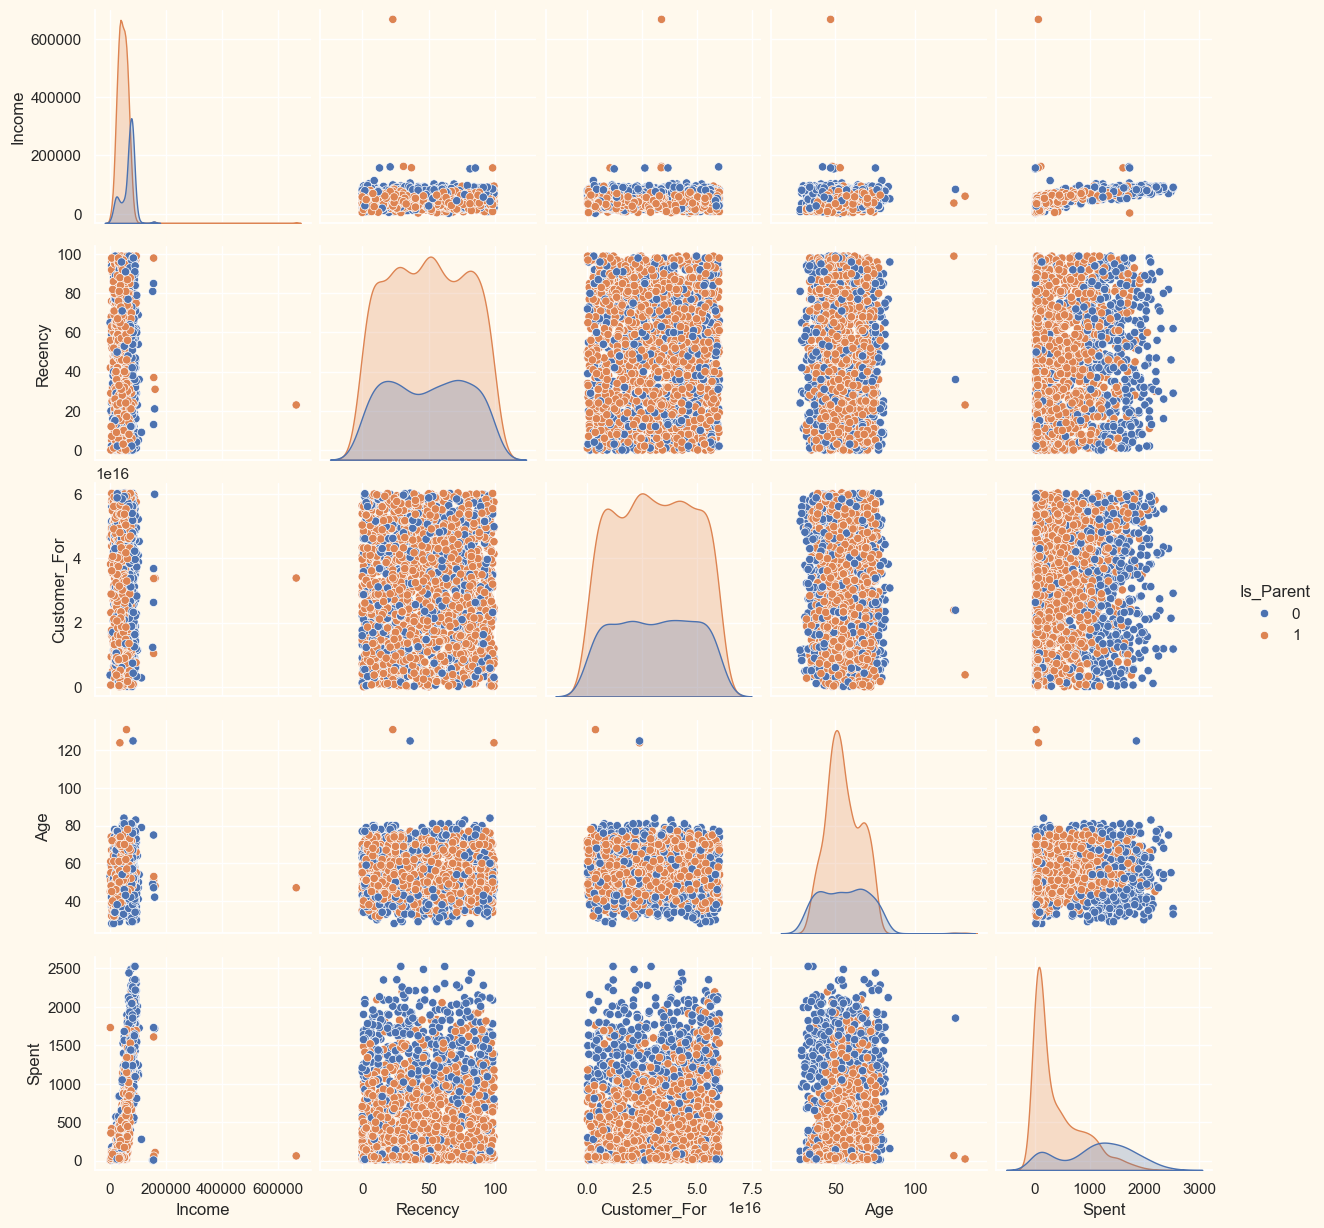

In [75]:
to_plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})

print("Reletive Plot Of Some Selected Features: A Data Subset")

sns.pairplot(data[to_plot], hue= "Is_Parent")

There are few outliers

In [76]:
data = data[data.Income < 300000]
data = data[data.Age < 90]

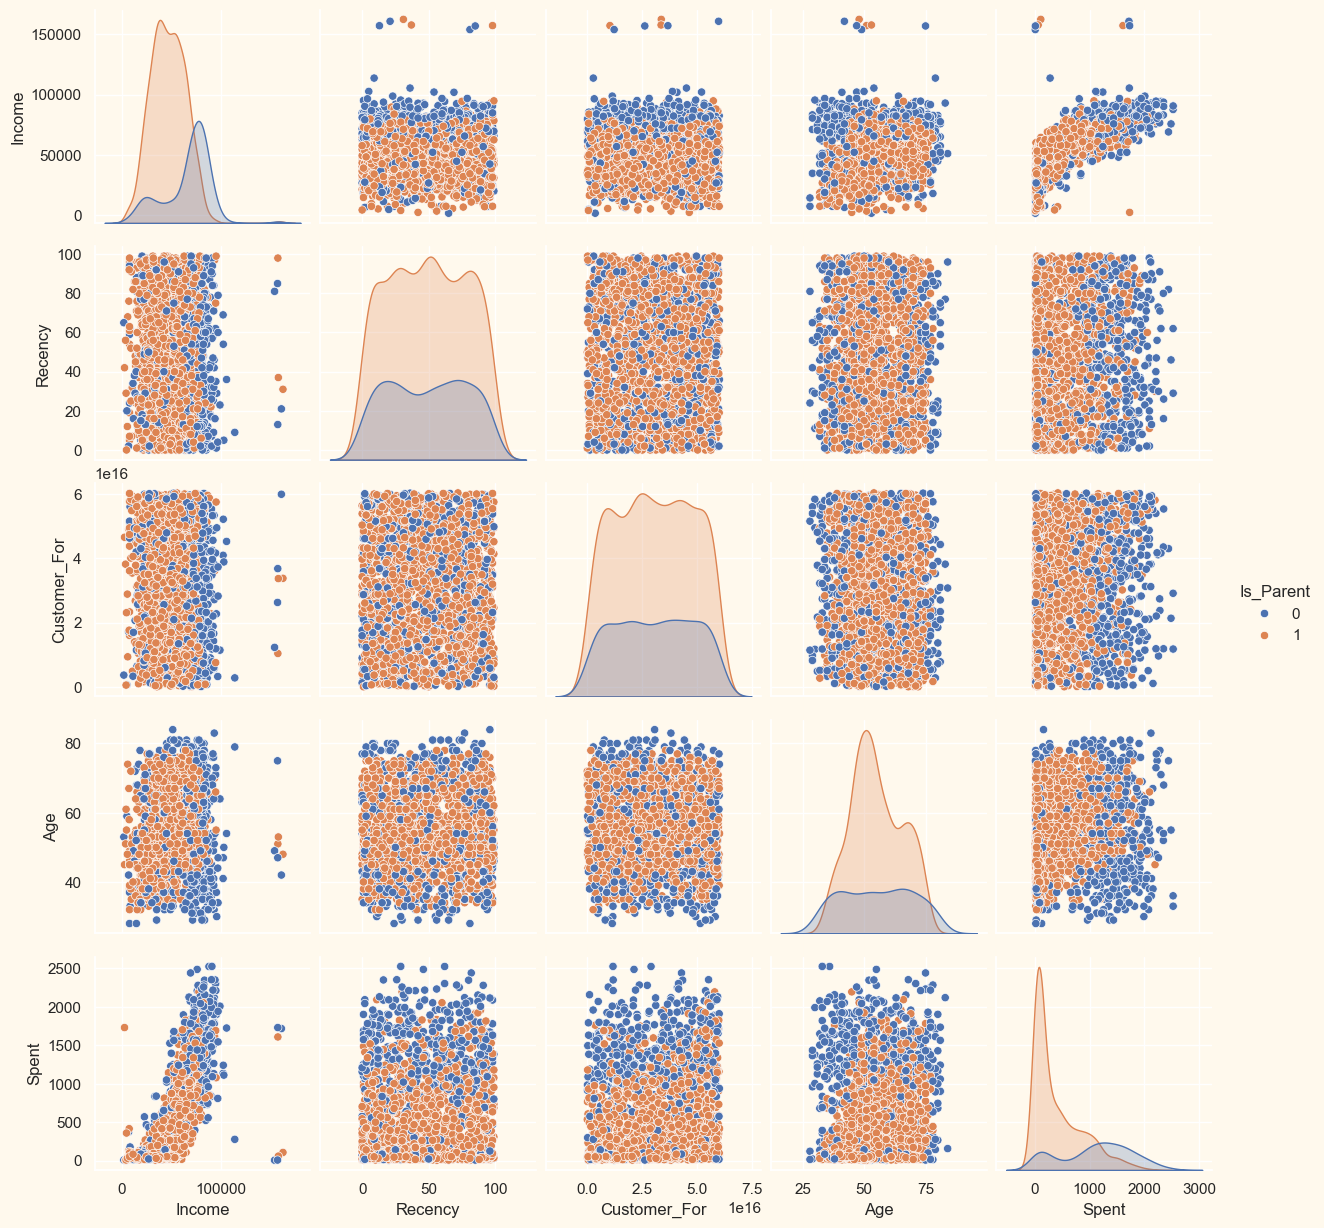

In [77]:
sns.pairplot(data[to_plot], hue= "Is_Parent")

<Axes: >

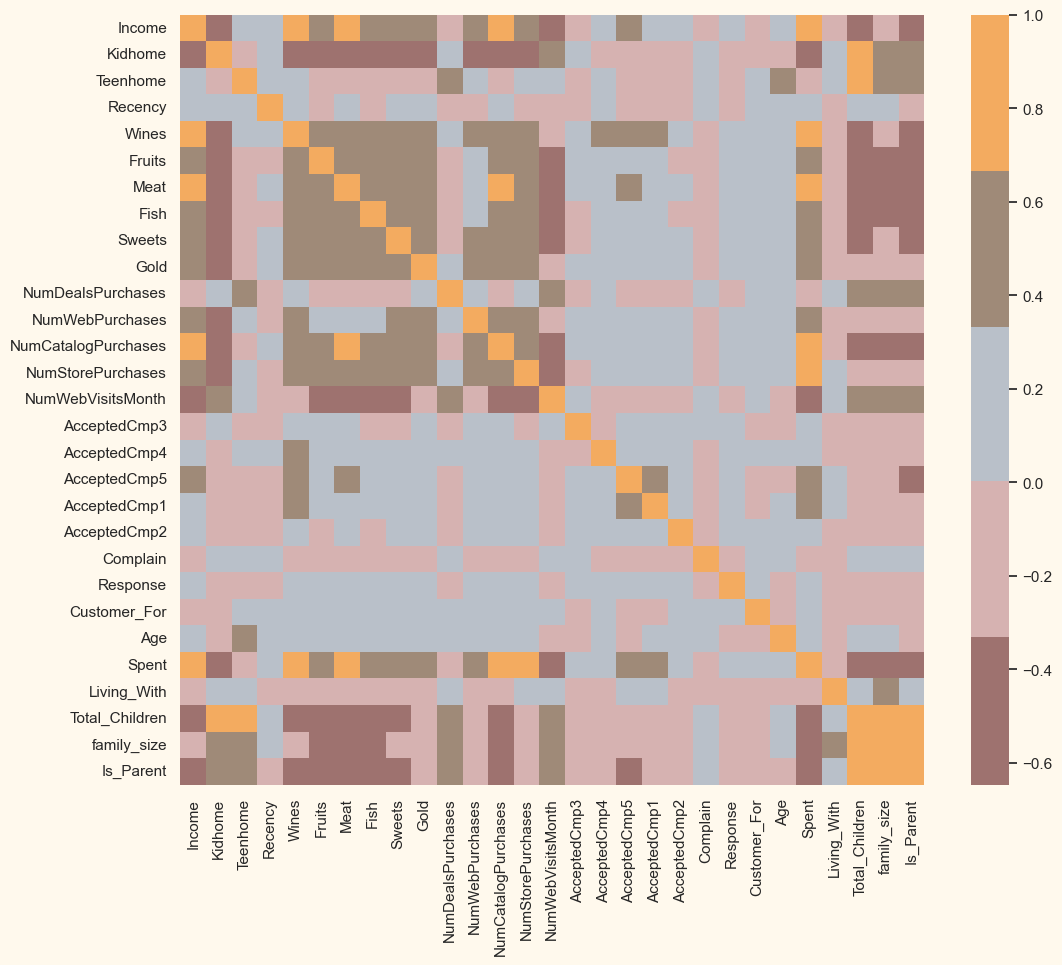

In [78]:
to_plot = data.select_dtypes(include='number')
from matplotlib import colors

cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])

#correlation matrix
corrmat = to_plot.corr()
plt.figure(figsize=(12,10))  
sns.heatmap(corrmat,annot=False, center=0, cmap=cmap)

# Data Preprocessing

- Label encoding the categorical features
- Scaling the features using the standard scaler
- Creating a subset dataframe for dimensionality reduction


In [79]:
columns_object = data.loc[:, data.dtypes == "object"].columns
columns_object

Index(['Education'], dtype='object')

In [80]:
encoders = {}

for col in columns_object:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    encoders[col] = le
print("All features are now numerical")


All features are now numerical


In [ ]:
# cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']

# tmp = data.drop(columns=cols_del)
# scaler = StandardScaler()
# scaler.fit(tmp)
# scaled_ds = pd.DataFrame(scaler.transform(tmp),columns= tmp.columns )
# print("All features are now scaled")

All features are now scaled


In [83]:
scaler = StandardScaler()
scaler.fit(data)
scaled_ds = pd.DataFrame(scaler.transform(data),columns= data.columns )
print("All features are now scaled")

All features are now scaled


# DIMENSIONALITY REDUCTION

- Dimensionality reduction with PCA
- Plotting the reduced dataframe

In [97]:
# Principal Composent Analysis
n_dims = 3

pca = PCA(n_components=n_dims)

PCA_df = pd.DataFrame(pca.fit_transform(scaled_ds), columns = ["Feature_1","Feature_2","Feature_3"])

display(PCA_df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Feature_1,2236.0,1.398206e-16,2.955613,-5.917042,-2.547169,-0.857478,2.252499,8.544296
Feature_2,2236.0,1.779535e-16,1.716465,-4.169929,-1.350985,-0.158927,1.238963,6.037401
Feature_3,2236.0,9.533221e-17,1.386317,-3.136111,-0.785577,-0.160292,0.407459,8.320160


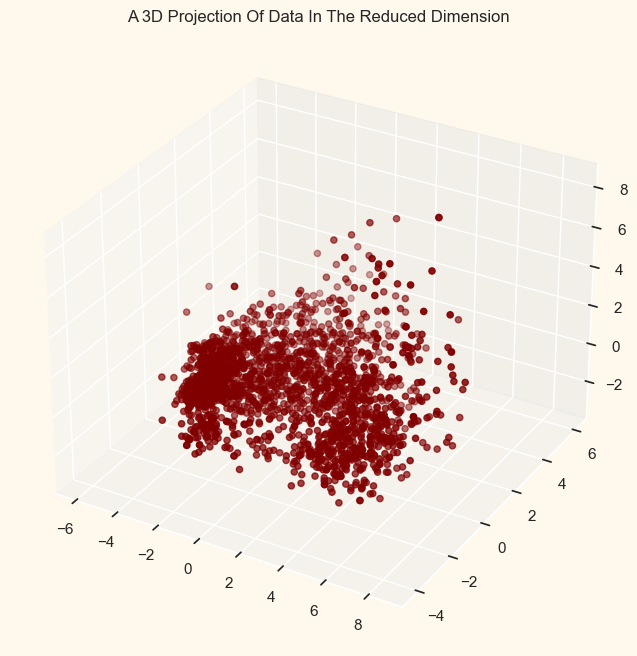

In [ ]:
x =PCA_df["Feature_1"]
y =PCA_df["Feature_2"]
z =PCA_df["Feature_3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

-----
-----